In [1]:
import pandas as pd
import re
import spacy
import nltk
from nltk.corpus import stopwords
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nohindi_noduplicate_df = pd.read_pickle("data/nohindi_noduplicate_recipes.pkl")
nohindi_noduplicate_df

,name,description,cuisine,course,diet,prep_time,ingredients,instructions
0,Doddapatre Tambuli Recipe (Karpooravalli Thayi...,Doddapatre Tambuli Recipe is a popular healing...,Indian,Side Dish,Vegetarian,30.0,"4 cups Indian borage (Doddapatre) , cleaned an...","To begin making the Doddapatre Tambuli, first ..."
1,Fish Tandoori Recipe,Have you ever tried out fish tandoori? Trust m...,North Indian,Appetizer,High Protein Non Vegetarian,80.0,"1 Fish , nicely washed with bones on (I used P...","To begin making the Fish Tandoori recipe, keep..."
2,Arbi Shimla Mirch Sabzi Recipe – Colocasia Cap...,Arbi Shimla Mirch Sabzi Recipe is a variation ...,North Indian,Main Course,No Onion No Garlic (Sattvic),55.0,300 grams Colocasia root (Arbi) 1 Green Bell ...,To begin making the Arbi Shimla Mirch Sabzi Re...
3,Ambur Style Brinjal Curry Recipe,Brinjal Curry is prepared in different ways in...,Indian,Lunch,Vegetarian,20.0,5 Brinjal (Baingan / Eggplant) 1 Onion 2 Tom...,To begin making the Ambur Style Brinjal Curry ...
4,Mavinakayi Menasinakai Curry Recipe - Raw Man...,Mangalorean Mavinakayi Menasinakai Curry Recip...,Mangalorean,Side Dish,Vegetarian,35.0,"1 cup Mango (Raw) , diced 2 tablespoons Jagge...",To begin making Mangalorean Mavinakayi Menasin...
...,...,...,...,...,...,...,...,...
9423,Spinach Oats Vada Recipe,Spinach Oats Vada Recipe is a healthy twist to...,South Indian,Snack,Vegetarian,50.0,"Spinach Leaves (Palak), Chana dal (Bengal Gram...","To prepare Spinach Oats Vada Recipe, in a larg..."
9424,Kerala Style Vettu Cake Recipe (Eggless Wholew...,Vettu cake is a famous tea shop snack in Tamil...,Kerala,Snack,Vegetarian,65.0,"Whole Wheat Flour, Sugar, Cooking soda, Butter...",To prepare Kerala Style Vettu Cake Recipe (Egg...
9425,Amla/Nellikai Thogayal Recipe (Gooseberry Chut...,The Gooseberry (Amla/Nellikai) Chutney recipe ...,South Indian,Side Dish,Vegetarian,25.0,"Amla (Nellikai/ Gooseberry), Fresh coconut, Me...","To begin making the Amla Thogayal, we will fir..."
9426,Kanchakalar Khosha Bata | A Traditional Bengal...,Kanchakalar Khosha Bata is a traditional Benga...,Bengali,Side Dish,Vegetarian,30.0,"Raw Banana, Garlic, Green Chilli, Salt, Mustar...",To begin the preparation of Kanchakalar Khosha...


In [3]:
#change the oreder of columns
column_order = ['name', 'ingredients', 'description', 'instructions', 'cuisine', 'course', 'diet', 'prep_time']
recom_df = nohindi_noduplicate_df[column_order ]

In [4]:
recom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9428 entries, 0 to 9427
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          9428 non-null   object 
 1   ingredients   9428 non-null   object 
 2   description   9428 non-null   object 
 3   instructions  9428 non-null   object 
 4   cuisine       9420 non-null   object 
 5   course        9394 non-null   object 
 6   diet          9394 non-null   object 
 7   prep_time     9419 non-null   float64
dtypes: float64(1), object(7)
memory usage: 589.4+ KB


In [5]:
recom_df.describe(include="all")

,name,ingredients,description,instructions,cuisine,course,diet,prep_time
count,9428,9428,9428,9428,9420,9394,9394,9419.000000
unique,6437,9416,6426,9428,77,13,10,NaN
top,Doddapatre Tambuli Recipe (Karpooravalli Thayi...,,Murungai Keerai or Drumstick leaves or Moringa...,"To begin making the Doddapatre Tambuli, first ...",Indian,Lunch,Vegetarian,NaN
freq,2,6,4,1,1558,2471,6458,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.816435
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.882448
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.000000


In [6]:
recom_df["name"].value_counts()

name
Doddapatre Tambuli Recipe (Karpooravalli Thayir Pachadi)                                          2
Sweet and Spicy Tomato Chutney Recipe                                                             2
Italian Cheese And Basil Uttappam Recipe                                                          2
Nimbu Chunda Recipe (Lemon Chutney) - No Cook And Oil Free                                        2
Gujarati Vagharela Mag Recipe - Moong Sprouts Sabzi Recipe                                        2
                                                                                                 ..
Vanilla Chocolate Chip Cookie Recipe Using Archana's Kitchen Vanilla Chocolate Chip Cookie Mix    1
Healthy Foxtail Millet Raw Mango & Vegetable Salad Recipe                                         1
Thai Baked Chicken Satay Recipe With Thai Peanut Sauce                                            1
Whole Wheat Rosemary Focaccia Bread Recipe                                                     

In [7]:
recom_df["cuisine"] = recom_df['cuisine'].str.replace('Gujarati \ufeff', 'Gujarati')
recom_df["cuisine"] = recom_df['cuisine'].str.replace('Gujarati \\ufeff', 'Gujarati')

recom_df["cuisine"].unique()

array(['Indian', 'North Indian', 'Mangalorean', 'Kerala', 'Konkan',
       'South Indian', 'Tamil Nadu', 'Bengali', 'Andhra', 'Coorg',
       'Hyderabadi', 'Kashmiri', 'Punjabi', 'Gujarati',
       'Coastal Karnataka', 'Karnataka', 'Goan', 'Sichuan', 'Udupi',
       'Chettinad', 'Maharashtrian', 'Mughlai', 'Malvani',
       'North East India', 'Rajasthani', 'Parsi', 'Bihari', 'Awadhi',
       'North Karnataka', 'Assamese', 'Pakistani', 'Himachal',
       'Middle Eastern', 'Oriya', 'Uttarakhand-North Kumaon', 'Lucknowi',
       'Sindhi', 'Indo Chinese', 'Uttar Pradesh', 'Kongunadu', 'Chinese',
       'Haryana', 'South Karnataka', 'Fusion', nan, 'Malabar', 'Nepalese',
       'Continental', 'Jharkhand', 'Sri Lankan', 'Thai', 'Arab',
       'Nagaland', 'Afghan', 'Asian', 'African', 'Korean', 'European',
       'Mexican', 'Japanese', 'Italian', 'Mediterranean', '', 'Jewish',
       'Vietnamese', 'French', 'Cantonese', 'Caribbean', 'Indonesian',
       'American', 'Malaysian', 'Greek', 'Burm

In [8]:
recom_df["cuisine"].value_counts()

cuisine
Indian          1558
North Indian    1357
Continental     1083
South Indian    1023
Bengali          287
                ... 
Burmese            2
Jewish             1
Hunan              1
Bangladeshi        1
Singapore          1
Name: count, Length: 76, dtype: int64

In [9]:
recom_df["course"].value_counts()

course
Lunch                     2471
Side Dish                 1469
Dessert                   1041
Dinner                    1002
Snack                      974
Appetizer                  749
South Indian Breakfast     492
Main Course                485
World Breakfast            289
North Indian Breakfast     218
Indian Breakfast           154
One Pot Dish                42
Brunch                       8
Name: count, dtype: int64

In [10]:
recom_df["diet"].value_counts()

diet
Vegetarian                      6458
High Protein Vegetarian          903
Non Vegeterian                   624
Diabetic Friendly                423
Eggetarian                       383
High Protein Non Vegetarian      340
No Onion No Garlic (Sattvic)     100
Gluten Free                       85
Vegan                             63
Sugar Free Diet                   15
Name: count, dtype: int64

Categorize the "prep_time" column and conduct EDA on it

In [11]:
recom_df["prep_time"].value_counts()

prep_time
40.0     1370
30.0     1162
50.0      900
35.0      774
45.0      755
         ... 
310.0       1
335.0       1
455.0       1
450.0       1
53.0        1
Name: count, Length: 167, dtype: int64

In [12]:
def categorize_preparation_time(time):
    if time <= 15:
        return '~15 min'
    elif time <= 30:
        return '~30 min'
    elif time <= 45:
        return '~45 min'
    elif time <= 60:
        return '~1 hour'
    elif time <= 75:
        return '~1 hour 15 min'
    elif time <= 90:
        return '~1 hour 30 min'
    elif time <= 105:
        return '~1 hour 45 min'
    elif time <= 120:
        return '~2 hours'
    else:
        # For times beyond 120 minutes, categorize in 30-minute intervals, in hours
        hours = time // 60
        if time % 60 <= 15:
            return f'~{hours} hours'
        elif time % 60 <= 45:
            return f'~{hours} hours 30 min'
        else:
            return f'~{hours + 1} hours'

recom_df['categorized_prep_time'] = recom_df['prep_time'].apply(categorize_preparation_time)
recom_df['categorized_prep_time']

0              ~30 min
1       ~1 hour 30 min
2              ~1 hour
3              ~30 min
4              ~45 min
             ...      
9423           ~1 hour
9424    ~1 hour 15 min
9425           ~30 min
9426           ~30 min
9427           ~15 min
Name: categorized_prep_time, Length: 9428, dtype: object

In [13]:
recom_df['categorized_prep_time'].value_counts().sort_values(ascending=False)

categorized_prep_time
~45 min               2912
~30 min               2288
~1 hour               2047
~1 hour 15 min         664
~15 min                492
~1 hour 30 min         278
~1 hour 45 min         135
~2.0 hours 30 min      111
~3.0 hours              68
~2 hours                66
~2.0 hours              39
~3.0 hours 30 min       38
~6.0 hours 30 min       33
~4.0 hours 30 min       33
~9.0 hours              32
~8.0 hours 30 min       30
~7.0 hours              23
~4.0 hours              22
~5.0 hours 30 min       18
~5.0 hours              16
~8.0 hours              12
~9.0 hours 30 min       12
~6.0 hours              11
~7.0 hours 30 min       11
~10.0 hours 30 min       9
~nan hours               9
~12.0 hours              3
~14.0 hours              2
~10.0 hours              2
~48.0 hours 30 min       2
~12.0 hours 30 min       2
~16.0 hours              2
~47.0 hours              1
~24.0 hours              1
~15.0 hours 30 min       1
~13.0 hours 30 min       1
~13.0 

In [14]:
len(recom_df['categorized_prep_time'].unique())

38

Plot the distribution of four "course", "diet", "cuisine" and "categorized_prep_time" columns

In [15]:
def plot_top_categories(df, column, top_n=20):
   
    # Count the occurrences and sort in descending order
    sorted_counts = df[column].value_counts().sort_values(ascending=False)
    
    # Limit to top N categories if there are more than top_n
    categories_to_plot = sorted_counts[:top_n]
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=categories_to_plot.values, y=categories_to_plot.index, color = "skyblue")
    
    plt.title(f'{column.capitalize()} Distribution')
    plt.ylabel(column.capitalize())
    plt.xlabel('Frequency')
    plt.xticks(rotation=45)
    plt.rc('font', family='Arial', size=12)

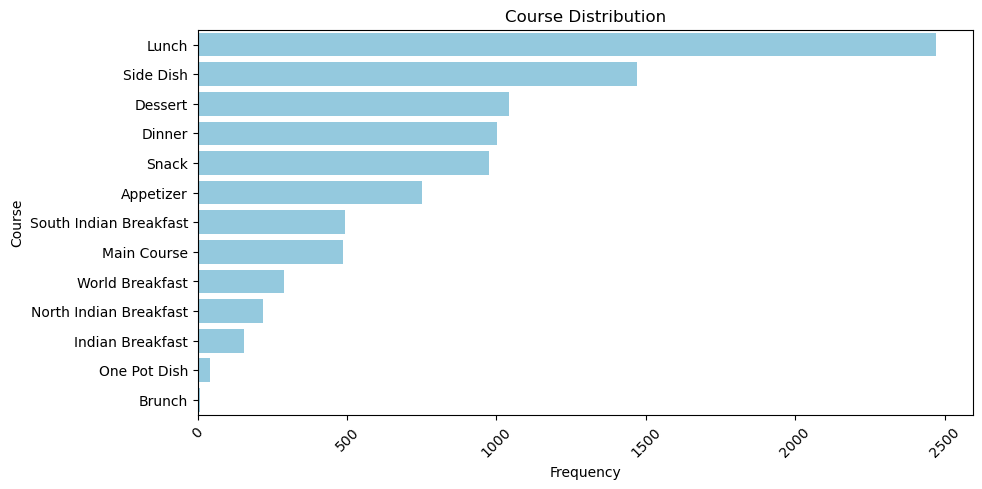

In [16]:
plot_top_categories(recom_df, 'course')

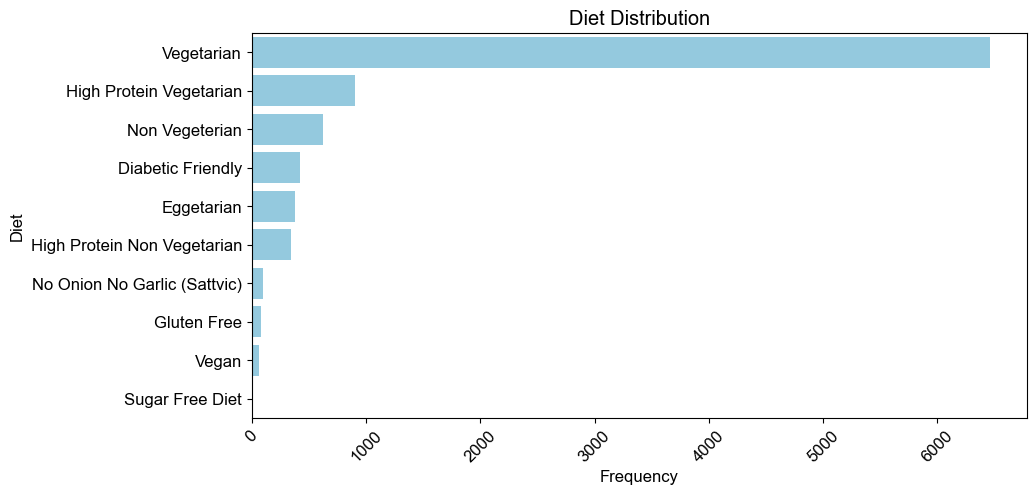

In [17]:
plot_top_categories(recom_df, 'diet')

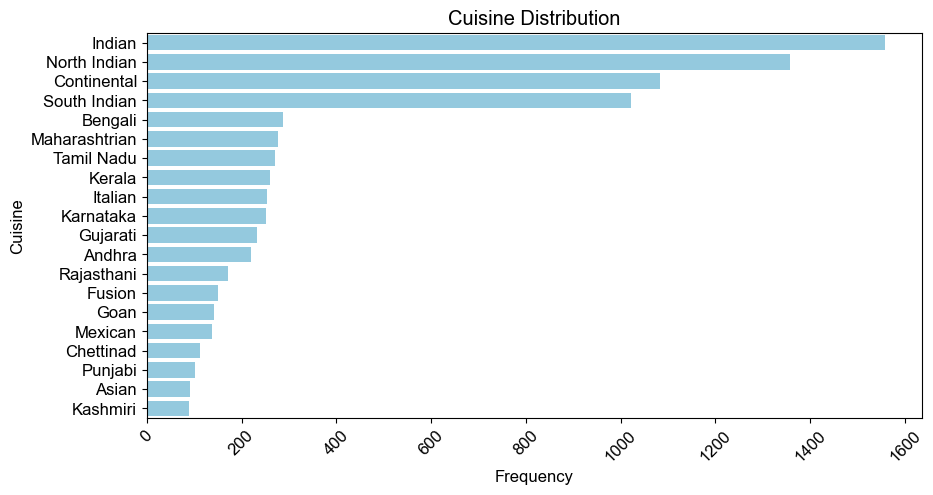

In [18]:
plot_top_categories(recom_df, 'cuisine')

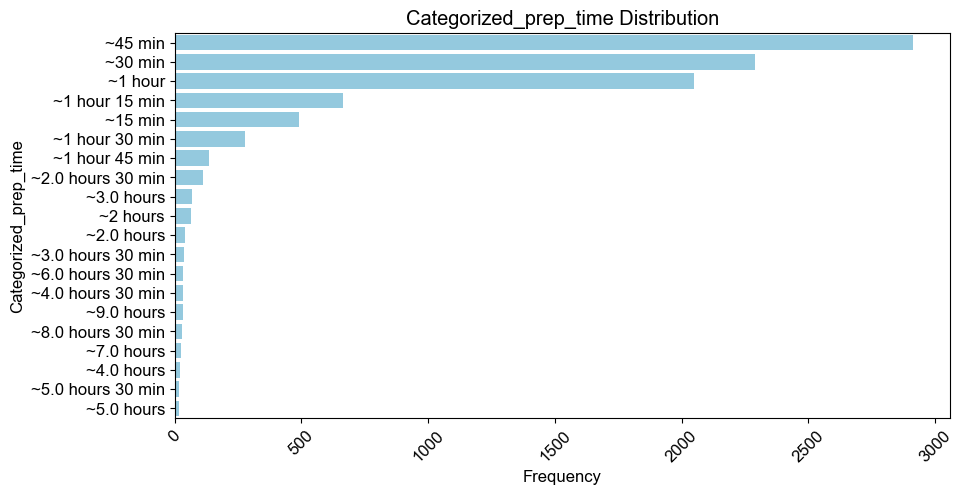

In [19]:
plot_top_categories(recom_df, 'categorized_prep_time')

Clean the "ingredients" column 

In [20]:
unwanted_words = ['cleaned','and','washed','as','needed','thinly','sliced','Thin','add','adjustable','adjust','just','unripe', 'unskimmed', 
                  'more', 'more if','rings', 'I', 'have','used', 'I like adding','mashed','you', 'can',"minced",'preferably','per','about',
                  'warm','very', 'vertically','well','long','tsp','tbsp', 'uncooked','unpeeled','your','th','the','of','powdered',
                  'could', 'also', 'use','give', 'it','is', 'prefered','if','bunch','a','small', 'piece','pieces', 'pinch',"medium sized",
                  'additional','assorted','approximately','optional','broken','bowl','finely','chopped','small','cut','roasted',
                  'thick','cubes','julienned','deseeded', "de-veined",'slices', "only", "need",'taste', 'required','boiled',"big", "large",
                  'coarsely','pounded','grated','blanched','a','few','pureed','made','cubed','steamed','quartered','into','preferable',
                  'peeled','slivered','or','whisked','nicely','on','diced',' but recommended','according','overnight',"peel",
                  'soaked','in','roughly','Wet','Ingredients','Everest brand', 'Enough','any','other','s ', 'teaspoon', "one","two",
                  'tablespoons','tablespoon', "eggless", " gluten free", "no onion", "no garlic", "no egg", "no eggs"]

# Download stopwords list
nltk.download('stopwords') 
stop_words = set(stopwords.words('english'))
#stop_words.update(unwanted_words)

# Load the English language model from spaCy
nlp = spacy.load("en_core_web_sm")

# Function to clean and retain only nouns (ingredients)
def clean_ingredients(ingredient_text):
    cleaned_text = re.sub(r'^"|"', '', ingredient_text.strip())
    icleaned_text =  re.sub(r'Archanas\s*Kitchen|Archana\\\\s Kitchen', '',cleaned_text)
    cleaned_text = re.sub(r'Archana\\s Kitchen', '',cleaned_text)
    cleaned_text = re.sub(r'\d+(?:-\d+)?(?:/\d+)?\s*(?:cup|cups?|tablespoon|tablespoons?|teaspoon|teaspoons?|gms?|gram|grams?|kg|ml|inch|pound|pounds?|liters?)?\s*', ',', 
                          cleaned_text, flags=re.IGNORECASE)# Remove quantities and units
    cleaned_text = re.sub(r'\d+\s+\b\w+\b', ',', cleaned_text, flags=re.IGNORECASE)##find a number followed by unit
    cleaned_text = re.sub(r'\b(to|for|with|without|salt)\b', r', \1', cleaned_text, flags=re.IGNORECASE) # Add a comma before the words "to" or "for" (case-insensitive)
    
    for word in unwanted_words:
        cleaned_text = re.sub(r'\b' + re.escape(word) + r'\b', '', cleaned_text, flags=re.IGNORECASE)

     # Split the cleaned text into individual ingredients 
    ingredient_list = [ingredient.strip().lower() for ingredient in cleaned_text.split(',') if ingredient.strip() 
                       and not ingredient.strip().lower().startswith('for') 
                       and not ingredient.strip().lower().startswith('to') 
                       and not ingredient.strip().lower().startswith('with')
                      and not ingredient.strip().lower().startswith('without')
                      and not ingredient.strip().lower().startswith('no')]
    
    processed_ingredients = []
    for ingredient in ingredient_list:
        # Create a spaCy document object for each ingredient
        doc = nlp(ingredient)
        # Keep only noun phrases or single nouns as ingredients
        lemmatized_words = [token.lemma_.lower() for token in doc if token.pos_ not in {"VERB", "ADV"} and token.is_alpha and token.text.lower() not in stop_words]
        if lemmatized_words:  # if it is not empty
            processed_ingredients.append(" ".join(lemmatized_words))  # Join multi-word ingredients like 'cumin powder' 
    return  processed_ingredients

recom_df['cleaned_ingredients'] = recom_df['ingredients'].apply(clean_ingredients)
recom_df['cleaned_ingredients']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rogha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       [indian borage doddapatre, curd dahi yogurt, c...
1       [fish, curd dahi yogurt, onion, green chilli, ...
2       [colocasia root arbi, green bell pepper capsic...
3       [brinjal baingan eggplant, onion, ginger garli...
4       [mango raw, jaggery, turmeric powder haldi, ta...
                              ...                        
9423    [spinach leave palak, chana dal bengal gram da...
9424    [whole wheat flour, sugar, soda, butter, salt,...
9425    [amla gooseberry, fresh coconut, methi seed fe...
9426    [raw banana, garlic, green chilli, salt, musta...
9427    [onion, green chilli, mint leave pudina, fresh...
Name: cleaned_ingredients, Length: 9428, dtype: object

In [21]:
recom_df["cleaned_ingredients"].value_counts()

cleaned_ingredients
[]                                                                                                                                                                             6
[lemon, sugar, salt, red chilli powder]                                                                                                                                        5
[milk, curd dahi yogurt]                                                                                                                                                       3
[indian borage doddapatre, curd dahi yogurt, cumin seeds jeera, whole black peppercorn, coconut, salt, ghee]                                                                   2
[soy chunk nugget, hot water, onion, garlic, ginger, red chilli powder, garam masala powder, chaat masala powder, salt, lemon juice, coriander dhania]                         2
                                                                                               

Create a unique ingredient list and count the unique ingredient items

In [22]:
# Create a unique ingredient set by flattening the list and removing duplicates
unique_ingredient_list = set(ingredient for sublist in recom_df["cleaned_ingredients"] for ingredient in sublist if ingredient)

#Convert the set to a list
unique_ingredient_list = sorted(unique_ingredient_list)
unique_ingredient_list

['aa oil',
 'aachi fish masala',
 'aam papad sun mango',
 'aamra',
 'aar maach fish',
 'achari masala',
 'achari masala oil',
 'achari mayo',
 'active dry yeast',
 'ada',
 'adjus',
 'adobo sauce',
 'agar agar',
 'agathi keerai',
 'ajwain carom seed',
 'ajwain carom seeds black sesame seed',
 'ajwain carom seeds curry leave',
 'ajwain carom seeds water',
 'ajwain powder',
 'akhrot',
 'al dente',
 'alfalfa powder',
 'alfalfa sprout',
 'alma nellikai',
 'almond',
 'almond almond butter',
 'almond badam',
 'almond butter',
 'almond cashew',
 'almond cashewnut',
 'almond essence badam essence',
 'almond meal badam powder',
 'almond milk',
 'almond milk badam milk',
 'almond nuts pistachio',
 'almond oil badam oil',
 'almond paste',
 'aloe vera extract',
 'along',
 'aloo bhujia',
 'aloo tikki potato',
 'alu',
 'amaranth',
 'amaranth seeds rajgira',
 'ambade',
 'amchur dry mango powder',
 'amchur dry mango powder coriander dhania',
 'amchur dry mango powder mint leave pudina',
 'amchur dry ma

In [23]:
len(unique_ingredient_list)

2639

Find the most frequent ingredients and plot their distribution 

In [24]:
#Flatten the list of ingredients from all rows
all_ingredients = [ingredient for sublist in recom_df['cleaned_ingredients'] for ingredient in sublist]

#Count the frequency of each ingredient
ingredient_counts = Counter (all_ingredients)

most_frequent_ingredients = ingredient_counts.most_common(10) 

print(f"Most frequent ingredients: {most_frequent_ingredients[0][0]}, Count: {most_frequent_ingredients[0][1]}")

sorted_clean_ingredients = ingredient_counts.most_common()  
print(sorted_clean_ingredients)

Most frequent ingredients: salt, Count: 8341
[('salt', 8341), ('oil', 3893), ('turmeric powder haldi', 3751), ('onion', 3706), ('green chilli', 3449), ('garlic', 3106), ('red chilli powder', 2862), ('ginger', 2591), ('cumin seeds jeera', 2575), ('mustard seed kadugu', 2210), ('coriander dhania', 2114), ('ghee', 1827), ('water', 1768), ('dry red chilli', 1707), ('sugar', 1673), ('asafoetida hing', 1490), ('milk', 1467), ('garam masala powder', 1392), ('coriander powder dhania', 1385), ('fresh coconut', 1362), ('curry', 1347), ('cumin powder jeera', 1132), ('curd dahi yogurt', 1095), ('lemon juice', 1095), ('cinnamon stick dalchini', 1047), ('black pepper powder', 1005), ('extra virgin olive oil', 948), ('clove laung', 896), ('carrot gajjar', 877), ('cardamom elaichi pod seed', 872), ('potato aloo', 868), ('jaggery', 862), ('whole black peppercorn', 838), ('nut', 769), ('whole wheat flour', 759), ('white urad dal split', 744), ('sprig curry', 734), ('butter', 713), ('cardamom powder elai

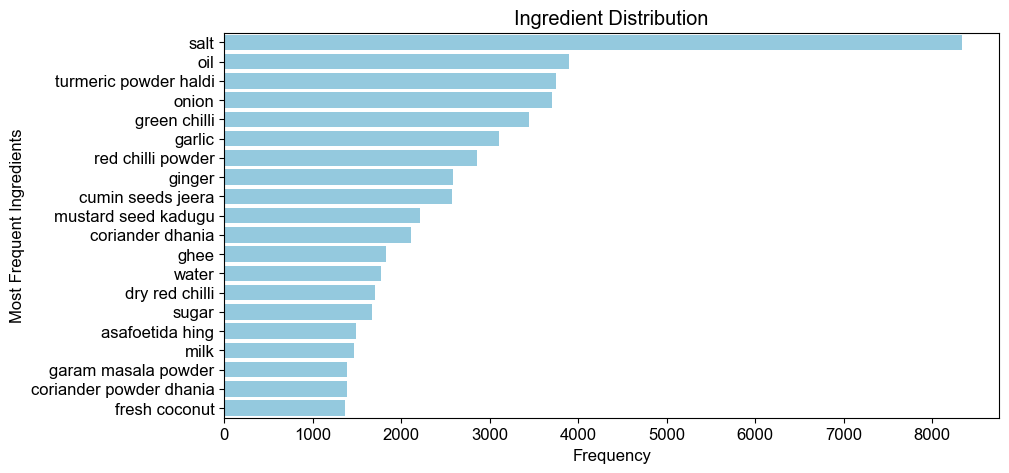

In [25]:
# Separate the ingredient names and their counts for plotting
ingredients, counts = zip(*sorted_clean_ingredients)

plt.figure(figsize=(10, 5)) 
sns.barplot(x=counts[:20], y=ingredients[:20], color='skyblue')  
plt.title('Ingredient Distribution')  
plt.xlabel('Frequency') 
plt.ylabel('Most Frequent Ingredients')  
plt.rc('font', family='Arial', size=12)
plt.show()  

Find allergen food in "cleaned_ingredients" column

In [26]:

allergen_list = ['milk', 'cheese', 'feta', 'paneer','yogurt', 'butter', 'cream', 'egg', 'tree nut', 'walnut', 'Pistachio', 'hazelnut','almond', 'pecan', 'cashew','peanut', 
                 'wheat','grain','cereal', 'triticale', 'barley', 'oats', 'rye','bread', 'naan', 'pasta', 'spaghetti', 'macaroni', 'lasagna', 'soy', 'soybean', 'soya','lupin', 'mustard', 'sesame', 
                 'fish','salmon', 'tuna', 'cod', 'crustacea','mollusc', 'clam', 'mussel', 'oyster','squid', 'shellfish', 'crab', 'lobster', 'shrimp']

# Function to find allergens in each row of ingredients
def find_allergens(ingredient_list):
    allergens_found = [ingredient for ingredient in ingredient_list if ingredient in allergen_list]
    return allergens_found if allergens_found else None  # Return None if no allergens are found

recom_df['allergens'] = recom_df['cleaned_ingredients'].apply(find_allergens)
recom_df['allergens']

0                 None
1               [fish]
2                 None
3                 None
4                 None
             ...      
9423              None
9424    [butter, milk]
9425              None
9426              None
9427              None
Name: allergens, Length: 9428, dtype: object

In [27]:
recom_df['allergens'].value_counts()

allergens
[milk]                          970
[butter]                        379
[milk, milk]                    104
[walnut]                         81
[butter, milk]                   75
                               ... 
[milk, butter, milk, cheese]      1
[butter, walnut, walnut]          1
[walnut, milk, milk]              1
[pasta, shrimp]                   1
[butter, butter, cheese]          1
Name: count, Length: 95, dtype: int64

Process the texts of "name", "instructions" and "description" columns to prepare them for allergen search

In [28]:
unwanted_words = ["recipe", "no egg", "no egges", "no onion", "no garlic"]
# Load the English model in spaCy
nlp = spacy.load("en_core_web_sm")

# Load stopwords
stop_words = set(stopwords.words('english'))
#stop_words.update(unwanted_words)

# Function to process the text (lemmatization and removing stopwords) and return only nouns. 
def process_text(text):
    for word in unwanted_words:
        cleaned_text = re.sub(r'\b(?:' + '|'.join(map(re.escape, unwanted_words)) + r')\b', '', text, flags=re.IGNORECASE)

    doc = nlp(cleaned_text)  # Process the text with spaCy NLP model
    lemmatized_words = []
    for token in doc:
        if token.text.lower() == "eggless":
            lemmatized_words.append(token.text.lower())
        # Skip if token is not alphabetic, is a stopword, or is an unwanted word
        if token.is_alpha and token.text.lower() not in stop_words:
            lemmatized_words.append(token.lemma_.lower())
        # Preserve "eggless" as-is

    # Remove "egg" if "eggless" is present in the list
    if "eggless" in lemmatized_words and "egg" in lemmatized_words:
        lemmatized_words = [word for word in lemmatized_words if word != "egg"]   
            
    return ' '.join(lemmatized_words)  # Return processed text as a string
   
recom_df['processed_name'] = recom_df['name'].apply(process_text)
recom_df['processed_instructions'] = recom_df['instructions'].apply(process_text)
recom_df['processed_description'] = recom_df['description'].apply(process_text)

In [29]:
#recom_df['name'][0]

In [30]:
#recom_df['processed_name'][0]

In [31]:
##recom_df['instructions'][0]

In [32]:
#recom_df['processed_instructions'][0]

Search for allergen food in combined processed columns 

In [33]:
# Function to search for allergens in combined processed columns 
def find_allergens(row, allergen_list):
    allergens_found = set()
    
    # Combine processed text columns to search within them
    combined_text = ' '.join([row['processed_name'], row['processed_instructions'], row['processed_description']])
    
    for allergen in allergen_list:
        if allergen in combined_text:
            allergens_found.add(allergen)
    
    # If allergens are found, update the allergen column as a list
    if allergens_found:
        # Check if there are existing allergens in the row 
        existing_allergens = row['allergens']
        if existing_allergens is None:
            existing_allergens = []  

        # Combine new allergens with existing ones, ensuring uniqueness
        updated_allergens = list(set(existing_allergens) | allergens_found)
        return updated_allergens  
    
    # If no new allergens are found, return the existing allergen list
    return row['allergens']

recom_df['allergens'] = recom_df.apply(lambda row: find_allergens(row, allergen_list), axis=1)
recom_df['allergens']

0                         [yogurt]
1                           [fish]
2                         [peanut]
3        [mustard, sesame, peanut]
4                         [sesame]
                   ...            
9423                        [oats]
9424    [butter, milk, wheat, egg]
9425                          None
9426                     [mustard]
9427                     [mustard]
Name: allergens, Length: 9428, dtype: object

In [34]:
recom_df['allergens'].value_counts()

allergens
[mustard]                                    1220
[milk]                                        219
[wheat]                                       191
[yogurt]                                      173
[egg]                                         140
                                             ... 
[butter, bread, soy, pasta]                     1
[grain, soy]                                    1
[wheat, oats, milk, pasta, bread, cheese]       1
[feta, cheese, bread, wheat]                    1
[butter, walnut, milk, peanut]                  1
Name: count, Length: 1577, dtype: int64

In [35]:
#count none allergen rows 
recom_df['allergens'].isna().sum()

1539

In [36]:
recom_df['allergens'].fillna("unknown", inplace=True)

Check if eggless recipes have egg in their allergen and ingredient list

In [37]:
contain_eggless = recom_df[recom_df['name'].str.contains("Eggless", case=False, na=False)]
contain_eggless

,name,ingredients,description,instructions,cuisine,course,diet,prep_time,categorized_prep_time,cleaned_ingredients,allergens,processed_name,processed_instructions,processed_description
2558,Eggless Thandai Mini Cheesecake Recipe,"For the crust 1-1/2 cups Marie Biscuit , or an...",Thandai Mini Cheesecake Recipe is a delicious ...,"To begin with Thandai Mini Cheesecake, firstly...",Fusion,Dessert,Vegetarian,100.0,~1 hour 45 min,"[marie biscuit, digestive cookie, butter unsal...","[butter, milk, cream, cheese, egg]",eggless eggless thandai mini cheesecake,begin thandai mini cheesecake firstly prepare ...,thandai mini cheesecake delicious creamy desse...
3459,3 minute Eggless Strawberry Red Velvet Mug Cak...,"Archana\s Kitchen Strawberry Velvet Cake Mix, ...",Satisfy your sweet cravings in just 3 minutes ...,To begin making the\xa0Eggless Strawberry Red ...,Continental,Dessert,Vegetarian,6.0,~15 min,"[velvet cake mix, oil, curd dahi yogurt, nut]","[barley, egg, milk, wheat, cashew]",minute eggless eggless strawberry red velvet m...,begin make strawberry red velvet mug cake firs...,satisfy sweet craving minute eggless eggless s...
3589,Pineapple Upside Down Cake Made with Archana's...,"Archana\s Kitchen Rich Vanilla Cake Mix, Oil, ...",The Pineapple Upside Down Cake is an absolutel...,To begin making the Pineapple Upside Down Cake...,Continental,Snack,Vegetarian,40.0,~45 min,"[rich vanilla cake mix, oil, curd dahi yogurt,...","[butter, barley, grain, milk, yogurt, cream, e...",pineapple upside cake make archana kitchen egg...,begin make pineapple upside cake first measure...,pineapple upside cake absolutely delectable ca...
3677,Eggless Bread Omelette Recipe,"Gram flour (besan), All Purpose Flour (Maida),...",Bread Omelette is very common recipe but this ...,"To begin making Eggless Bread Omelette Recipe,...",Continental,World Breakfast,Vegetarian,15.0,~15 min,"[gram flour besan, purpose flour maida, red ch...","[butter, bread, egg]",eggless eggless bread omelette,begin make eggless eggless bread omelette take...,bread omelette common different prepare withou...
3725,Eggless Spicy Spinach Bread Recipe,"All Purpose Flour (Maida), Onion, Baking powde...",Eggless Spicy Spinach Bread is one of the quic...,To begin making the Eggless Spicy Spinach Brea...,Continental,World Breakfast,High Protein Vegetarian,60.0,~1 hour,"[purpose flour maida, onion, powder, salt, spi...","[butter, sesame, milk, bread, egg]",eggless eggless spicy spinach bread,begin make eggless eggless spicy spinach bread...,eggless eggless spicy spinach bread one quick ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9165,Eggless Herbed Focaccia Bread Recipe,"All Purpose Flour (Maida), Milk, Sugar, Salt, ...",This Eggless Herbed Focaccia Bread makes a gre...,"To prepare Eggless Focaccia Bread, get prep wi...",Italian,Side Dish,Vegetarian,180.0,~3.0 hours,"[purpose flour maida, milk, sugar, salt, activ...","[milk, bread, pasta, egg]",eggless eggless herbed focaccia bread,prepare eggless eggless focaccia bread get pre...,eggless eggless herbed focaccia bread make gre...
9220,Eggless Coffee Souffle Recipe With Chocolate S...,"Dark chocolate, Milk, Caster Sugar, All Purpos...",Coffee Souffle Recipe With Chocolate Sauce is ...,To prepare Eggless Coffee Souffle Recipe With ...,French,Dessert,Vegetarian,25.0,~30 min,"[dark chocolate, milk, caster sugar, purpose f...","[butter, milk, cream, egg]",eggless eggless coffee souffle chocolate sauce,prepare eggless eggless coffee souffle chocola...,coffee souffle chocolate sauce puff fluffy fra...
9262,Eggless Apple Pie Cookie Recipe,"Apples, Butter (Salted), Cinnamon Powder (Dalc...","A fridge full of apples, a cold gust of wind a...",To begin the preparation of Eggless Apple Pie ...,Continental,Dessert,Vegetarian,55.0,~1 hour,"[apple, butter, cinnamon powder dalchini, cane...","[butter, cream, egg]",eggless eggless apple pie cookie,begin preparation eggless eggless apple pie co...,fridge full apple cold gust wind love

In [38]:
contain_eggless["allergens"]

2558                   [butter, milk, cream, cheese, egg]
3459                   [barley, egg, milk, wheat, cashew]
3589    [butter, barley, grain, milk, yogurt, cream, e...
3677                                 [butter, bread, egg]
3725                   [butter, sesame, milk, bread, egg]
                              ...                        
9165                            [milk, bread, pasta, egg]
9220                           [butter, milk, cream, egg]
9262                                 [butter, cream, egg]
9409                                        [butter, egg]
9424                           [butter, milk, wheat, egg]
Name: allergens, Length: 119, dtype: object

In [39]:
ingredients = contain_eggless[contain_eggless['cleaned_ingredients'].str.contains(r'\begg\b', case=False, na=False)]
ingredients

,name,ingredients,description,instructions,cuisine,course,diet,prep_time,categorized_prep_time,cleaned_ingredients,allergens,processed_name,processed_instructions,processed_description


In [40]:
#name = contain_eggless[contain_eggless['processed_name'].str.contains(r'\begg\b', case=False, na=False)]
#name

In [41]:
#instructions = contain_eggless[contain_eggless['processed_instructions'].str.contains(r'\begg\b', case=False, na=False)]
#instructions

In [42]:
#description = contain_eggless[contain_eggless['processed_description'].str.contains(r'\begg\b', case=False, na=False)]
#description

Drop "egg" from the 'allergen' column for recipes which are eggless

In [43]:
recom_df.loc[contain_eggless.index, 'allergens'] = recom_df.loc[contain_eggless.index, 'allergens'].apply(
    lambda allergens: [a for a in allergens if a.lower() != 'egg'] if isinstance(allergens, list) else allergens)

In [44]:
correct_eggless = recom_df[recom_df['name'].str.contains("Eggless", case=False, na=False)]
correct_eggless

,name,ingredients,description,instructions,cuisine,course,diet,prep_time,categorized_prep_time,cleaned_ingredients,allergens,processed_name,processed_instructions,processed_description
2558,Eggless Thandai Mini Cheesecake Recipe,"For the crust 1-1/2 cups Marie Biscuit , or an...",Thandai Mini Cheesecake Recipe is a delicious ...,"To begin with Thandai Mini Cheesecake, firstly...",Fusion,Dessert,Vegetarian,100.0,~1 hour 45 min,"[marie biscuit, digestive cookie, butter unsal...","[butter, milk, cream, cheese]",eggless eggless thandai mini cheesecake,begin thandai mini cheesecake firstly prepare ...,thandai mini cheesecake delicious creamy desse...
3459,3 minute Eggless Strawberry Red Velvet Mug Cak...,"Archana\s Kitchen Strawberry Velvet Cake Mix, ...",Satisfy your sweet cravings in just 3 minutes ...,To begin making the\xa0Eggless Strawberry Red ...,Continental,Dessert,Vegetarian,6.0,~15 min,"[velvet cake mix, oil, curd dahi yogurt, nut]","[barley, milk, wheat, cashew]",minute eggless eggless strawberry red velvet m...,begin make strawberry red velvet mug cake firs...,satisfy sweet craving minute eggless eggless s...
3589,Pineapple Upside Down Cake Made with Archana's...,"Archana\s Kitchen Rich Vanilla Cake Mix, Oil, ...",The Pineapple Upside Down Cake is an absolutel...,To begin making the Pineapple Upside Down Cake...,Continental,Snack,Vegetarian,40.0,~45 min,"[rich vanilla cake mix, oil, curd dahi yogurt,...","[butter, barley, grain, milk, yogurt, cream, w...",pineapple upside cake make archana kitchen egg...,begin make pineapple upside cake first measure...,pineapple upside cake absolutely delectable ca...
3677,Eggless Bread Omelette Recipe,"Gram flour (besan), All Purpose Flour (Maida),...",Bread Omelette is very common recipe but this ...,"To begin making Eggless Bread Omelette Recipe,...",Continental,World Breakfast,Vegetarian,15.0,~15 min,"[gram flour besan, purpose flour maida, red ch...","[butter, bread]",eggless eggless bread omelette,begin make eggless eggless bread omelette take...,bread omelette common different prepare withou...
3725,Eggless Spicy Spinach Bread Recipe,"All Purpose Flour (Maida), Onion, Baking powde...",Eggless Spicy Spinach Bread is one of the quic...,To begin making the Eggless Spicy Spinach Brea...,Continental,World Breakfast,High Protein Vegetarian,60.0,~1 hour,"[purpose flour maida, onion, powder, salt, spi...","[butter, sesame, milk, bread]",eggless eggless spicy spinach bread,begin make eggless eggless spicy spinach bread...,eggless eggless spicy spinach bread one quick ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9165,Eggless Herbed Focaccia Bread Recipe,"All Purpose Flour (Maida), Milk, Sugar, Salt, ...",This Eggless Herbed Focaccia Bread makes a gre...,"To prepare Eggless Focaccia Bread, get prep wi...",Italian,Side Dish,Vegetarian,180.0,~3.0 hours,"[purpose flour maida, milk, sugar, salt, activ...","[milk, bread, pasta]",eggless eggless herbed focaccia bread,prepare eggless eggless focaccia bread get pre...,eggless eggless herbed focaccia bread make gre...
9220,Eggless Coffee Souffle Recipe With Chocolate S...,"Dark chocolate, Milk, Caster Sugar, All Purpos...",Coffee Souffle Recipe With Chocolate Sauce is ...,To prepare Eggless Coffee Souffle Recipe With ...,French,Dessert,Vegetarian,25.0,~30 min,"[dark chocolate, milk, caster sugar, purpose f...","[butter, milk, cream]",eggless eggless coffee souffle chocolate sauce,prepare eggless eggless coffee souffle chocola...,coffee souffle chocolate sauce puff fluffy fra...
9262,Eggless Apple Pie Cookie Recipe,"Apples, Butter (Salted), Cinnamon Powder (Dalc...","A fridge full of apples, a cold gust of wind a...",To begin the preparation of Eggless Apple Pie ...,Continental,Dessert,Vegetarian,55.0,~1 hour,"[apple, butter, cinnamon powder dalchini, cane...","[butter, cream]",eggless eggless apple pie cookie,begin preparation eggless eggless apple pie co...,fridge full apple cold gust wind love baking r...
9409,Apple Roses Recip

In [45]:
correct_eggless["allergens"]

2558                        [butter, milk, cream, cheese]
3459                        [barley, milk, wheat, cashew]
3589    [butter, barley, grain, milk, yogurt, cream, w...
3677                                      [butter, bread]
3725                        [butter, sesame, milk, bread]
                              ...                        
9165                                 [milk, bread, pasta]
9220                                [butter, milk, cream]
9262                                      [butter, cream]
9409                                             [butter]
9424                                [butter, milk, wheat]
Name: allergens, Length: 119, dtype: object

Create "allergen_type" column using the data in "allergens" column

In [46]:
allergen_categories = {
    "Dairy": ["milk", "paneer", "feta","cheese", "yogurt", "butter", "cream"],
    "Eggs": ["egg"],
    "Fish and Shellfish": ["fish", "shellfish", 'crustacea','mollusc', "salmon", "tuna", "cod", "shrimp", "crab", "lobster", "mussel", "oyster", "squid"],
    "Tree Nuts and Peanuts": ['tree nut', "almond", "cashew", "walnut", "peanut", "pistachio", 'pecan', 'hazelnut'],
    "Legumes and Seeds": ["peanut", "soybean",' soy', 'soya', "sesame", "mustard"],
    "Grains and Gluten": ["grain", 'triticale', "wheat", "barley", "rye", "oats", "cereal", 'bread', 'naan', 'pasta', 'spaghetti', 'macaroni', 'lasagna']
}
def categorize_allergens(allergens):
    allergen_types = []
    for allergen in allergens:
        for category, items in allergen_categories.items():
            if allergen in items and category not in allergen_types:
                allergen_types.append(category)
    return allergen_types if allergen_types else None

recom_df["allergen_type"] = recom_df["allergens"].apply(categorize_allergens)
recom_df["allergen_type"]

0                                          [Dairy]
1                             [Fish and Shellfish]
2       [Tree Nuts and Peanuts, Legumes and Seeds]
3       [Legumes and Seeds, Tree Nuts and Peanuts]
4                              [Legumes and Seeds]
                           ...                    
9423                           [Grains and Gluten]
9424                    [Dairy, Grains and Gluten]
9425                                          None
9426                           [Legumes and Seeds]
9427                           [Legumes and Seeds]
Name: allergen_type, Length: 9428, dtype: object

In [47]:
recom_df['allergen_type'].fillna("Unknown", inplace=True)

In [48]:
recom_df["allergen_type"].value_counts()

allergen_type
Unknown                                                                       1577
[Legumes and Seeds]                                                           1430
[Dairy]                                                                       1286
[Grains and Gluten]                                                            621
[Dairy, Grains and Gluten]                                                     524
                                                                              ... 
[Dairy, Fish and Shellfish, Grains and Gluten, Eggs]                             1
[Dairy, Fish and Shellfish, Legumes and Seeds]                                   1
[Tree Nuts and Peanuts, Grains and Gluten, Fish and Shellfish]                   1
[Dairy, Grains and Gluten, Fish and Shellfish, Eggs]                             1
[Tree Nuts and Peanuts, Legumes and Seeds, Grains and Gluten, Dairy, Eggs]       1
Name: count, Length: 185, dtype: int64

Check if index values of "Gluten free" data in "diet" column are matched with the index values of "Grains and Gluten" data in "allergen_type" column

In [49]:
gluten_free_df = recom_df[recom_df['diet']=="Gluten Free"]
gluten_free_df

,name,ingredients,description,instructions,cuisine,course,diet,prep_time,categorized_prep_time,cleaned_ingredients,allergens,processed_name,processed_instructions,processed_description,allergen_type
19,Cabbage & Buttermilk Curry Recipe,"1 Cabbage (Patta Gobi/ Muttaikose) , medium si...",Cabbage & Buttermilk Curry Recipe is one of my...,"To prepare Cabbage & Buttermilk Curry Recipe, ...",Indian,Lunch,Gluten Free,35.0,~45 min,"[cabbage muttaikose, green chilli, slit, musta...","[butter, mustard, milk]",cabbage buttermilk curry,prepare cabbage buttermilk curry prep ingredie...,cabbage buttermilk curry one mother creation a...,"[Dairy, Legumes and Seeds]"
177,Besan Arbi Roast Recipe - Spicy Colocasia Stir...,250 grams Colocasia root (Arbi) 2 tablespoon ...,Arbi is Colocasia or Taro Root. It’s a root ve...,"To begin making the Besan Arbi Roast Recipe, s...",Indian,World Breakfast,Gluten Free,50.0,~1 hour,"[colocasia root arbi, gram flour besan, red ch...",unknown,besan arbi roast spicy colocasia stir fry,begin make besan arbi roast scrub arbi get rid...,arbi colocasia taro root root vegetable gluten...,Unknown
203,Mixed Vegetable Akki Roti Recipe,"300 grams Rice flour 1 Carrot (Gajjar) , grat...",Mixed Vegetable Akki Roti is a famous recipe f...,"To prepare Mixed Vegetable Akki Roti Recipe, g...",North Karnataka,South Indian Breakfast,Gluten Free,85.0,~1 hour 30 min,"[rice flour, carrot gajjar, cucumber, green be...","[butter, bread]",mixed vegetable akki roti,prepare mixed vegetable akki roti grate chop v...,mixed vegetable akki roti famous karnataka art...,"[Dairy, Grains and Gluten]"
281,Masala Akki Roti With Spinach Recipe - sarvapi...,3 cups Rice flour 2 cups Water 1 cup Spring ...,Sarvapindi also known as Akki roti in some are...,To begin preparing the Masala Akki Roti with S...,Andhra,South Indian Breakfast,Gluten Free,100.0,~1 hour 45 min,"[rice flour, water, spring onion green, spinac...","[sesame, yogurt]",masala akki roti spinach sarvapindi,begin prepare masala akki roti spinach deep po...,sarvapindi also know akki roti area telangana ...,"[Legumes and Seeds, Dairy]"
348,Mini Bajra Uttapam Recipe,For the Bajra uttapam 1/2 cup Bajra (seeds) 1...,Mini Bajra Uttapam Recipe is essentially a mil...,"To begin making the Mini Bajra Uttapam Recipe,...",South Indian,South Indian Breakfast,Gluten Free,520.0,~8.0 hours 30 min,"[bajra seed, idli rice, white urad dal whole, ...",unknown,mini bajra uttapam,begin make mini bajra uttapam first make batte...,mini bajra uttapam essentially millet base utt...,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9204,Instant Puliyodharai Powder Recipe (Puliyogare...,"Tamarind, Jaggery, Asafoetida (hing), Salt, Ch...",Puliyodharai/Puliyogare/Pulihora is a traditio...,"""To begin making Instant Puliyodharai/ Puliyog...",South Indian,Appetizer,Gluten Free,55.0,~1 hour,"[tamarind, jaggery, asafoetida hing, salt, cha...","[mustard, sesame, peanut]",instant puliyodharai powder puliyogare pulihor...,begin make instant puliyogare pulihora powder ...,puliyodharai puliyogare pulihora traditional r...,"[Legumes and Seeds, Tree Nuts and Peanuts]"
9205,Homemade Herb Butter Recipe,"Butter (Salted), Parsley leaves, Basil leaves,...",Having a Homemade Herb Butter ready in your re...,To begin making the\xa0Homemade Herb Butter Re...,Continental,Side Dish,Gluten Free,30.0,~30 min,"[butter, parsley, basil leave, lemon zest]","[butter, bread, pasta]",homemade herb butter,begin make herb butter combine ingredient mini...,homemade herb butter ready refrigerator get re...,"[Dairy, Grains and Gluten]"
9206,Kolhapuri Masala Recipe (Maharashtrian Masala ...,"Coriander (Dhania) Seeds, Cumin seeds (Jeera),...",Kolhapuri Masala Recipe is a spicy Maharashtri...,To begin making the\xa0Kolhapuri Masala Recipe...,Maharashtrian,Side Dish,Gluten Free,30.0,~30 min,"[coriander dhania seed, cumin seeds jeera, coc...",unknown,kolhapuri masala maharashtrian masala chutney ...,begin make masala traditional mahar

In [50]:
gluten_df = recom_df[recom_df["allergen_type"].apply(lambda x: "Grains and Gluten" in x)]
gluten_df

,name,ingredients,description,instructions,cuisine,course,diet,prep_time,categorized_prep_time,cleaned_ingredients,allergens,processed_name,processed_instructions,processed_description,allergen_type
12,Mixed Vegetable Pulao Recipe,1 cup Brown Rice 2 tablespoons Ghee 2 cloves...,The Mixed Vegetable Pulao Recipe is a simple a...,To begin making the Mixed Vegetable Pulao Reci...,Indian,Dinner,Vegetarian,60.0,~1 hour,"[brown rice, ghee, garlic, green chilli, slit,...",[grain],mixed vegetable pulao,begin make mixed vegetable pulao first wash so...,mixed vegetable pulao simple quick cook dish b...,[Grains and Gluten]
14,Hyderabadi Shahi Mixed Vegetable Curry Recipe,"12 Baby Potatoes , boiled peeled and cubed 1/...",The Hyderabadi Shahi Mixed Vegetable Curry Rec...,To begin making the Hyderabadi Shahi Mixed Veg...,Hyderabadi,Lunch,Vegetarian,70.0,~1 hour 15 min,"[baby potato, green peas matar, carrot gajjar,...","[cream, almond, cashew, wheat]",hyderabadi shahi mixed vegetable curry,begin make hyderabadi shahi mixed vegetable cu...,hyderabadi shahi mixed vegetable curry rich gr...,"[Dairy, Tree Nuts and Peanuts, Grains and Gluten]"
22,Karwar Style Valval Recipe (Mixed Vegetables I...,"1 cup Green beans (French Beans) , Chopped 1 ...",Karwar Style Valval Recipe (Mixed Vegetables I...,To begin making the Karwar Style Valval Recipe...,Coastal Karnataka,Lunch,Vegetarian,35.0,~45 min,"[green bean french bean, carrot gajjar, green ...","[mustard, milk, wheat, cream]",karwar style valval mixed vegetables coconut milk,begin make karwar style valval mixed vegetable...,karwar style valval mixed vegetables coconut m...,"[Legumes and Seeds, Dairy, Grains and Gluten]"
28,Whole Wheat Lachha Paratha Recipe-Multilayered...,2 cups Whole Wheat Flour 1 teaspoon Salt Ghee...,The Whole Wheat Lachha Paratha Recipe is a cla...,To begin making the Whole Wheat Lachha Paratha...,Indian,Dinner,Diabetic Friendly,70.0,~1 hour 15 min,"[whole wheat flour, salt ghee]","[bread, paneer, wheat, yogurt]",whole wheat lachha paratha layered indian flat...,begin make whole wheat lachha paratha first kn...,whole wheat lachha paratha classic indian laye...,"[Grains and Gluten, Dairy]"
30,Baked Amritsari Kulcha Recipe (Without Yeast),1-1/2 cup All Purpose Flour (Maida) 1 teaspoo...,Kulcha is a type of mildly leavened flatbread ...,To begin making the Baked Amritsari Kulcha rec...,Punjabi,Dinner,Vegetarian,20.0,~30 min,"[purpose flour maida, salt, sugar, powder, sod...","[butter, sesame, bread, naan]",baked amritsari kulcha without yeast,begin make baked amritsari kulcha medium sized...,kulcha type mildly leaven flatbread originate ...,"[Dairy, Legumes and Seeds, Grains and Gluten]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9418,Arbi Cutlet Recipe (Spiced Colocasia Patties),"Colocasia root (Arbi), Onion, Green Chilli, Re...",Arbi Cutlet is a crispy golden brown patties m...,We begin making the Arbi Cutlet (Spiced Coloca...,North Indian,Snack,Vegetarian,40.0,~45 min,"[colocasia root arbi, onion, green chilli, red...",[bread],arbi cutlet spiced colocasia patties,begin make arbi cutlet spiced colocasia pattie...,arbi cutlet crispy golden brown patty make col...,[Grains and Gluten]
9420,Alu Vadi Or Patrode Recipe - Maharashtrian Sna...,"Colocasia Leaves (Arbi), Multigrain flour, Tam...",Alu vadi or Patrode is a typical Maharashtrian...,To begin making Alu Vadi or Patrode Recipe - M...,Maharashtrian,Snack,Vegetarian,40.0,~45 min,"[colocasia leave arbi, multigrain flour, tamar...","[grain, sesame]",alu vadi patrode maharashtrian snack colocasia...,begin make alu vadi patrode maharashtrian snac...,alu vadi patrode typical maharashtrian snack s...,"[Grains and Gluten, Legumes and Seeds]"
9422,Palak Puri Recipe (Crispy Spinach Puri Snack),"Whole Wheat Flour, Spinach Leaves (Palak), Gin...","Puri is deep fried Indian bread, commonly avai...","Wash the finely chopped spinach, and let it dr...",North Indian,Snack,Vegetarian,30.0,~30 min,"[whole wheat flour, spinach 

In [51]:
# Check if index values of glute_df are in gluten_free_df
similarity_gluten_wih_gluten_free = gluten_df.index.isin(gluten_free_df.index)

# This give us a boolean array indicating whether each index in glute_df is also in gluten_free_df
print(similarity_gluten_wih_gluten_free)

# Give index numbers that are present in both dataframes:
common_indices = gluten_df.index[similarity_gluten_wih_gluten_free]
print("Common indices:", common_indices.tolist())

[False False False ... False False False]
Common indices: [203, 578, 683, 782, 892, 1438, 1609, 2190, 3124, 4239, 4766, 5043, 5086, 5383, 5509, 5538, 5539, 5608, 6750, 6905, 7818, 8440, 8464, 8867, 9205, 9212, 9412]


In [52]:
#recom_df.iloc[5121]

In [53]:
#recom_df["description"][5121]

In [54]:
#recom_df["instructions"][5121]

Find the most frequent allergen type and plot their distribution 

In [55]:
#Flatten the list of ingredients from all rows
all_allergen_type = [allergen for sublist in recom_df['allergen_type'] if isinstance(sublist, list) for allergen in sublist]

#Count the frequency of each allergen type
allergen_type_counts = Counter (all_allergen_type)

most_frequent_allergen_type = allergen_type_counts.most_common(10) 

print(f"Most frequent allergen type: {most_frequent_allergen_type[0][0]}, Count: {most_frequent_allergen_type[0][1]}")

sorted_allergen_type = allergen_type_counts.most_common()  
#print(sorted_allergen_type)

Most frequent allergen type: Dairy, Count: 4392


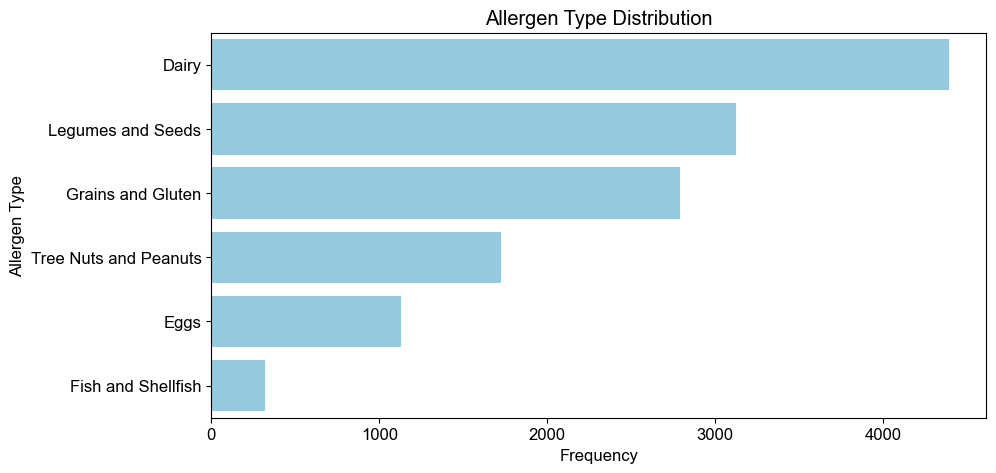

In [56]:
# Separate the allergen types and their counts for plotting
allergen_type, counts = zip(*sorted_allergen_type)

plt.figure(figsize=(10, 5)) 
sns.barplot(x=counts, y=allergen_type, color='skyblue')  
plt.title('Allergen Type Distribution')  
plt.xlabel('Frequency') 
plt.ylabel('Allergen Type')  
plt.rc('font', family='Arial', size=12)
plt.show()  

Prepare different combination of data for topic modeling

In [57]:
# Convert each list in the 'cleaned_ingredient' column to a space-separated string to standardize the form of all precocessed colmuns. 
recom_df["processed_ingredients"] = recom_df['cleaned_ingredients'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

#Combine processed columns of "processed_name"and "processed_ingredients" into a single column for topic modeling
recom_df['combined_name_ingredients'] = recom_df['processed_name'] + ' ' + recom_df['processed_ingredients']

# Combine all processed columns into a single column for topic modeling
recom_df['combined_texts'] = recom_df['processed_name'] + ' ' + recom_df['processed_ingredients'] + ' ' + recom_df['processed_description'] + ' ' + recom_df['processed_instructions']

In [58]:
recom_df.fillna('', inplace=True)
recom_df['prep_time_str'] = recom_df['prep_time'].astype(str)
# Convert `allergen_type` (list) to a string
recom_df['allergen_type_str'] = recom_df['allergen_type'].apply(lambda x: ', '.join(x) if isinstance(x, list) else '')

# Combine all relevant columns into a single string
recom_df['combined_all'] = (recom_df['processed_name'] + ' ' + recom_df['processed_ingredients'] + ' ' + recom_df['processed_description'] + ' ' +
        recom_df['processed_instructions'] + ' ' + recom_df['diet'] + ' ' + recom_df['course'] + ' ' + recom_df['cuisine'] + ' ' +
        recom_df['prep_time_str'] + ' ' + recom_df['allergen_type_str']
    )

recom_df['combined_all'] = recom_df['combined_all'].str.strip()
recom_df['combined_all'] 

C:\Users\rogha\AppData\Local\Temp\ipykernel_132556\2621597263.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  recom_df.fillna('', inplace=True)


0       doddapatre tambuli karpooravalli thayir pachad...
1       fish tandoori fish curd dahi yogurt onion gree...
2       arbi shimla mirch sabzi colocasia capsicum sab...
3       ambur style brinjal curry brinjal baingan eggp...
4       mavinakayi menasinakai curry raw mango coconut...
                              ...                        
9423    spinach oats vada spinach leave palak chana da...
9424    kerala style vettu cake eggless eggless wholew...
9425    amla nellikai thogayal gooseberry chutney amla...
9426    kanchakalar khosha bata traditional bengali ra...
9427    tomato onion chutney coconut mint onion green ...
Name: combined_all, Length: 9428, dtype: object

In [ ]:
#recom_df.to_pickle('data/processed_recipes.pkl')